# Import the necessary packages and define the path to the phaseb_data directory as well as the new directory you would like to save the altered files to. 

In [5]:
from astropy.io import fits
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'image.origin': 'lower'})
import os
from pathlib import Path
import misc
import glob

import roman_phasec_proper as phasec

opddir_old = Path(phasec.data_dir+'/maps')
opddir = Path('/groups/douglase/kians-data-files/roman-cgi-phasec-data/opd-maps')# path to new directory

opd_fpaths = sorted(glob.glob(str(opddir_old/'*.fits')))
opd_fpaths

['/groups/douglase/kians-data-files/phasec_data/maps/roman_phasec_DEFOCUSLENS1_phase_error_V1.0.fits',
 '/groups/douglase/kians-data-files/phasec_data/maps/roman_phasec_DEFOCUSLENS2_phase_error_V1.0.fits',
 '/groups/douglase/kians-data-files/phasec_data/maps/roman_phasec_DEFOCUSLENS3_phase_error_V1.0.fits',
 '/groups/douglase/kians-data-files/phasec_data/maps/roman_phasec_DEFOCUSLENS4_phase_error_V1.0.fits',
 '/groups/douglase/kians-data-files/phasec_data/maps/roman_phasec_DM1_phase_error_V1.0.fits',
 '/groups/douglase/kians-data-files/phasec_data/maps/roman_phasec_DM2_phase_error_V1.0.fits',
 '/groups/douglase/kians-data-files/phasec_data/maps/roman_phasec_FCM_EDU_measured_coated_phase_error_V2.0.fits',
 '/groups/douglase/kians-data-files/phasec_data/maps/roman_phasec_FILTER_phase_error_V1.0.fits',
 '/groups/douglase/kians-data-files/phasec_data/maps/roman_phasec_FOLD3_FLIGHT_measured_coated_phase_error_V2.0.fits',
 '/groups/douglase/kians-data-files/phasec_data/maps/roman_phasec_FOLD

In [2]:
phasec.data_dir

'/groups/douglase/kians-data-files/phasec_data'

roman_phasec_DEFOCUSLENS1_phase_error_V1.0.fits
1.012897e-05 spacing in meters


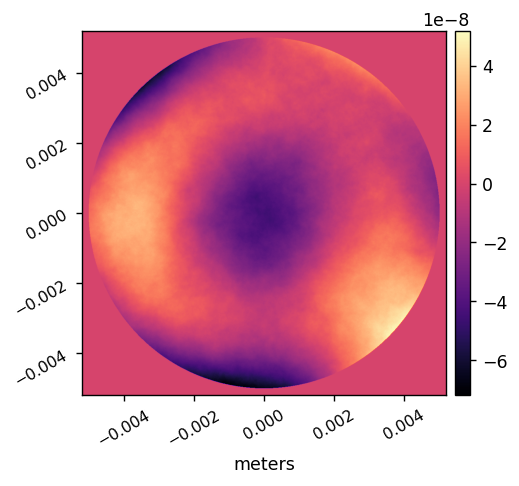

roman_phasec_DEFOCUSLENS2_phase_error_V1.0.fits
1.012897e-05 spacing in meters


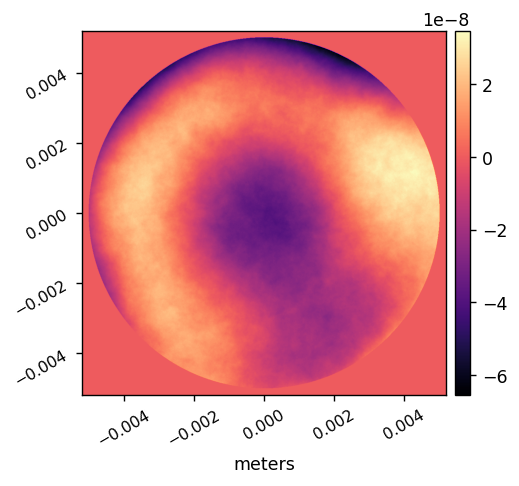

roman_phasec_DEFOCUSLENS3_phase_error_V1.0.fits
1.012897e-05 spacing in meters


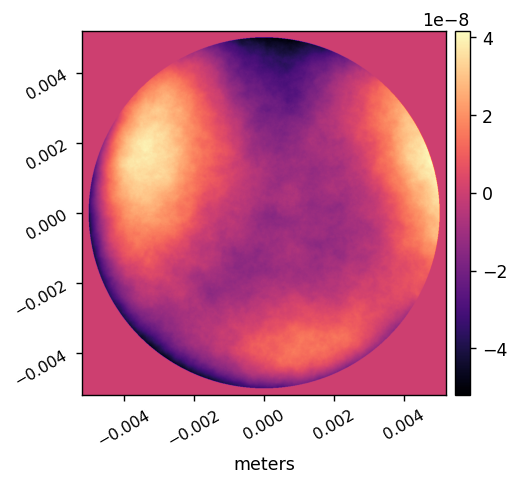

roman_phasec_DEFOCUSLENS4_phase_error_V1.0.fits
1.012897e-05 spacing in meters


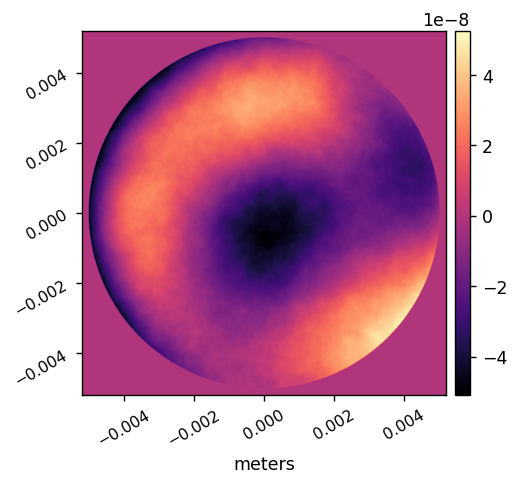

roman_phasec_DM1_phase_error_V1.0.fits
9.260112e-05 spacing in meters


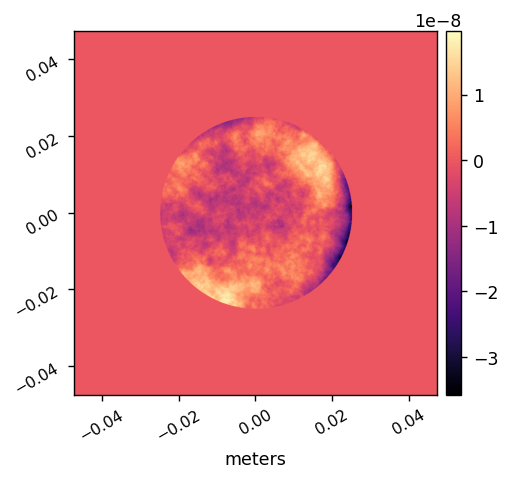

roman_phasec_DM2_phase_error_V1.0.fits
9.260112e-05 spacing in meters


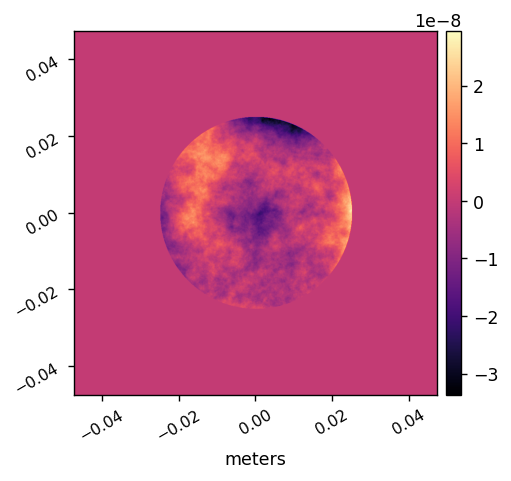

roman_phasec_FCM_EDU_measured_coated_phase_error_V2.0.fits
7.74442e-05 spacing in meters


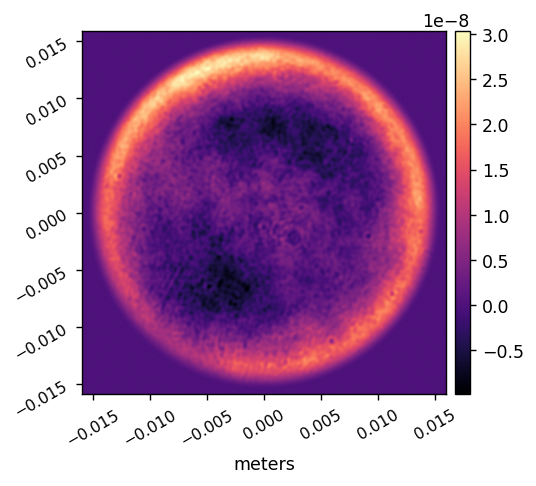

roman_phasec_FILTER_phase_error_V1.0.fits
1.012874e-05 spacing in meters


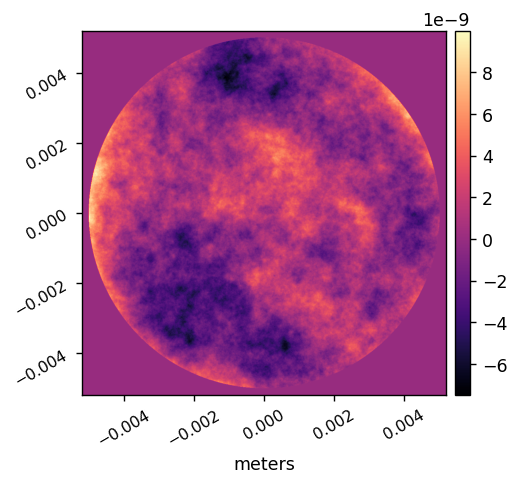

roman_phasec_FOLD3_FLIGHT_measured_coated_phase_error_V2.0.fits
8.15158e-05 spacing in meters


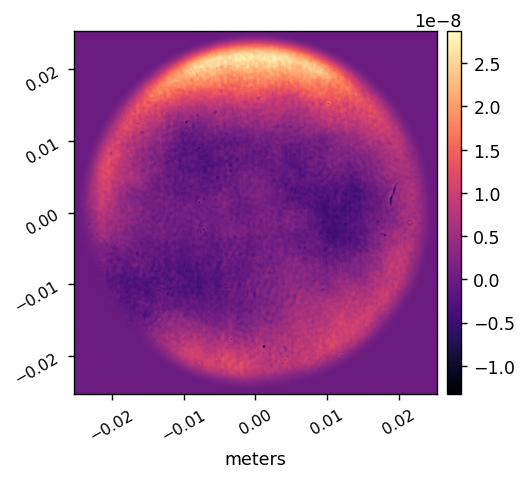

roman_phasec_FOLD4_phase_error_V1.0.fits
3.16e-06 spacing in meters


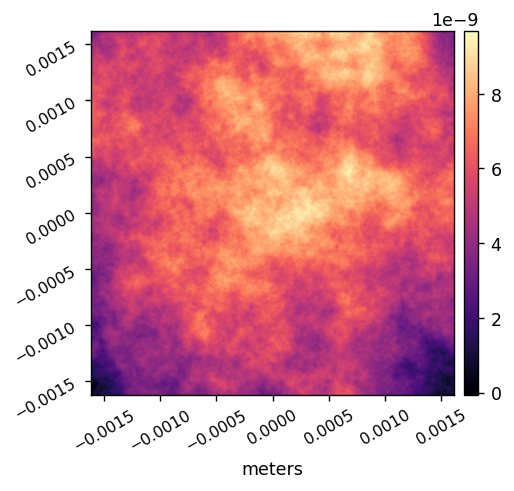

roman_phasec_FSM_FLIGHT_measured_coated_phase_error_V2.0.fits
0.000172703 spacing in meters


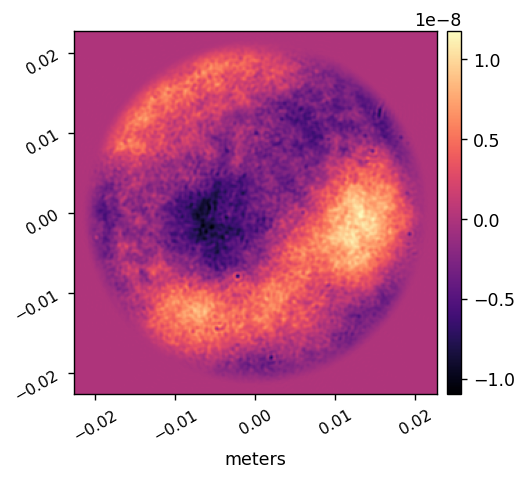

roman_phasec_LENS_phase_error_V1.0.fits
1.012897e-05 spacing in meters


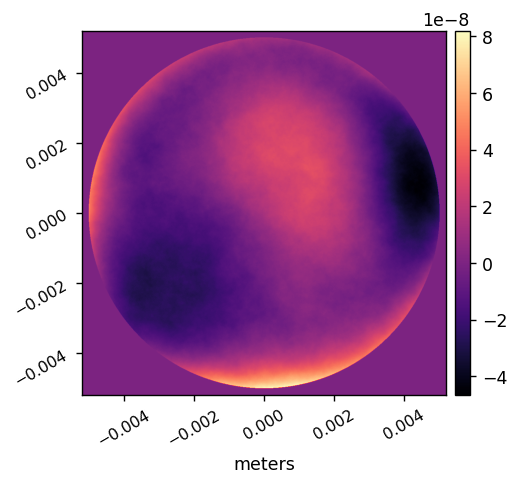

roman_phasec_LOWORDER_phase_error_V2.0.fits
8.047748e-05 spacing in meters


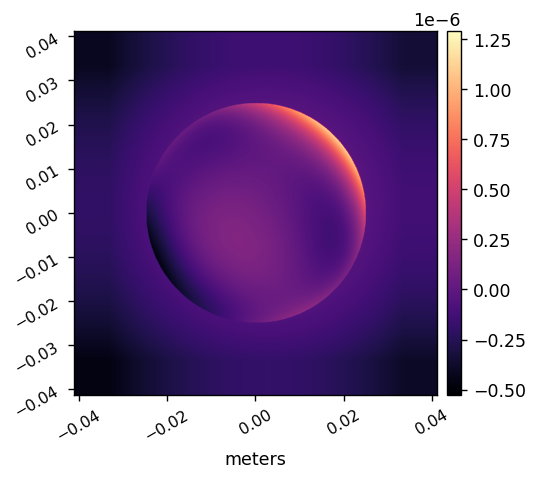

roman_phasec_M3_measured_phase_error_V1.1.fits
0.000237926 spacing in meters


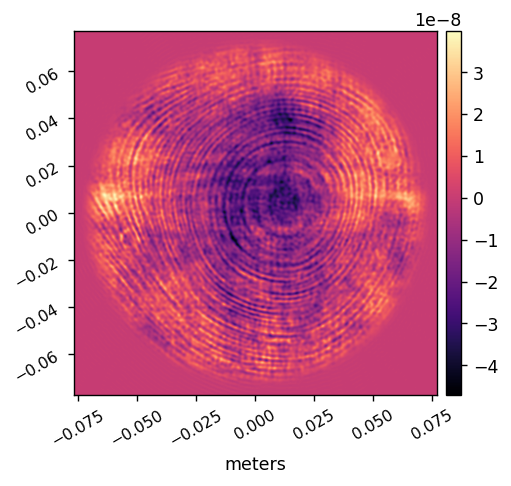

roman_phasec_M4_measured_phase_error_V1.1.fits
0.000186796 spacing in meters


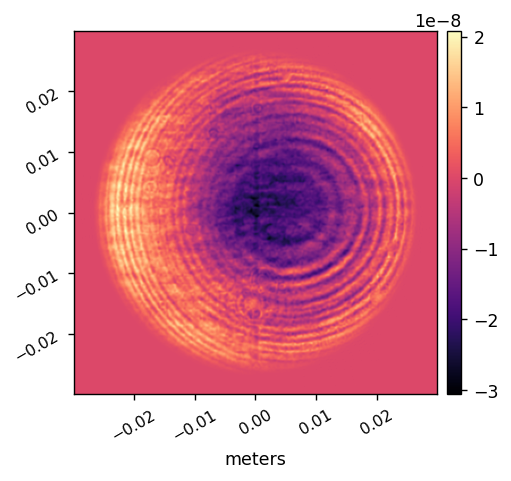

roman_phasec_M5_measured_phase_error_V1.1.fits
0.000119651 spacing in meters


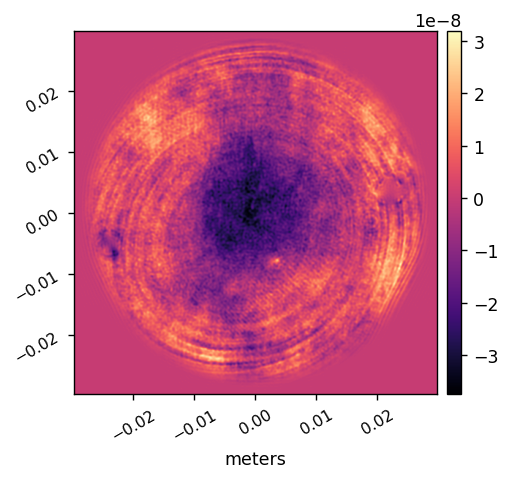

roman_phasec_OAP1_phase_error_V3.0.fits
8.04775e-05 spacing in meters


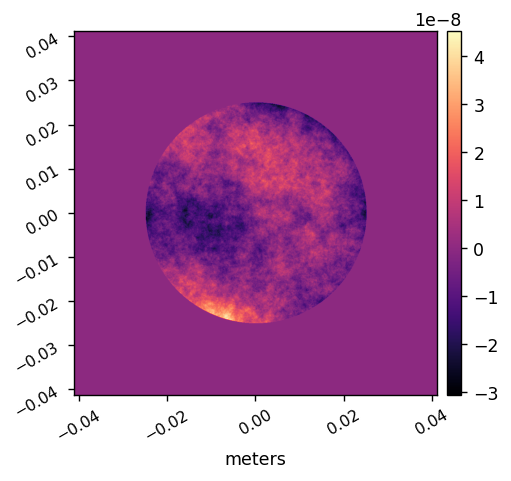

roman_phasec_OAP2_phase_error_V3.0.fits
9.260112e-05 spacing in meters


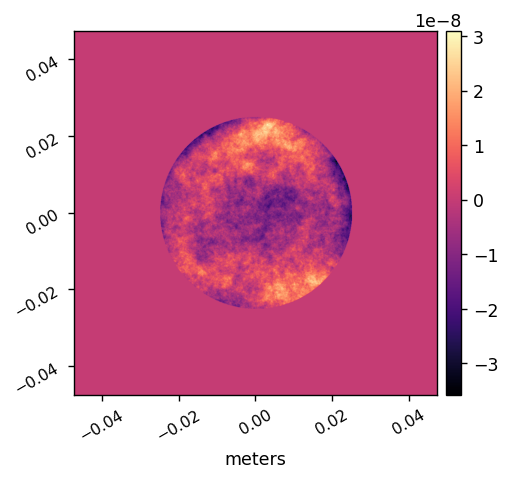

roman_phasec_OAP3_phase_error_V3.0.fits
9.260112e-05 spacing in meters


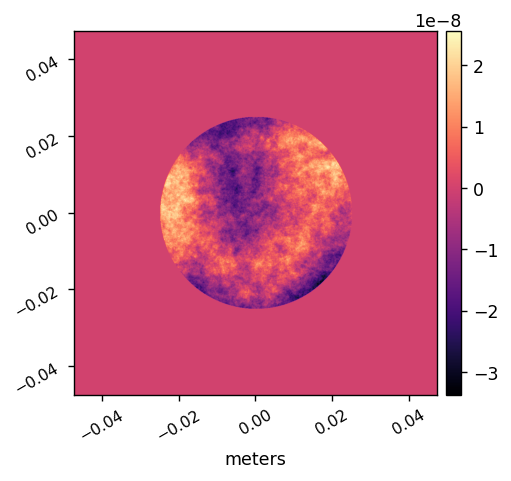

roman_phasec_OAP4_phase_error_V3.0.fits
3.400066e-05 spacing in meters


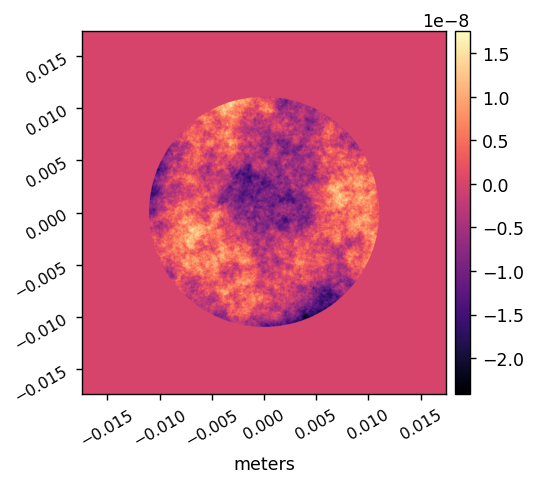

roman_phasec_OAP5_phase_error_V3.0.fits
3.400064e-05 spacing in meters


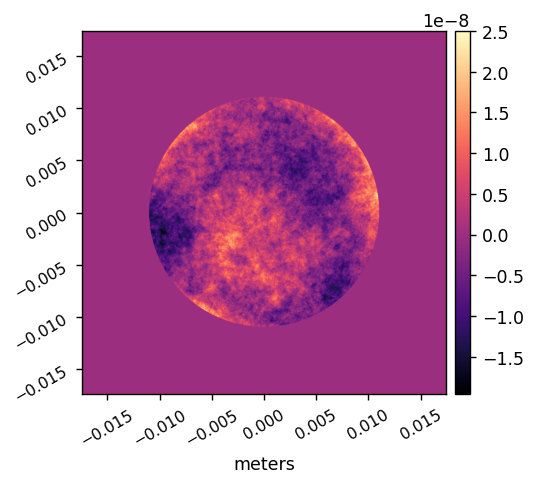

roman_phasec_OAP6_phase_error_V3.0.fits
3.411842e-05 spacing in meters


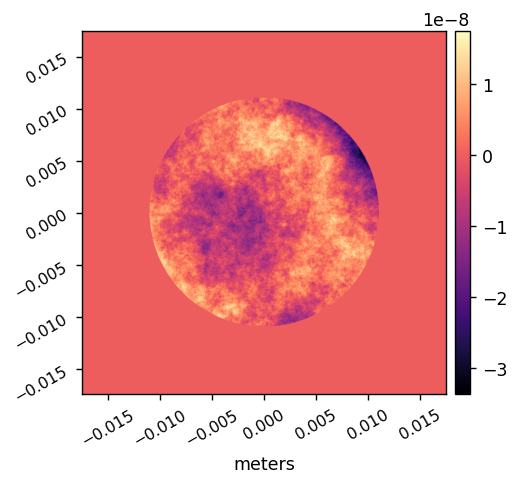

roman_phasec_OAP7_phase_error_V3.0.fits
3.41184e-05 spacing in meters


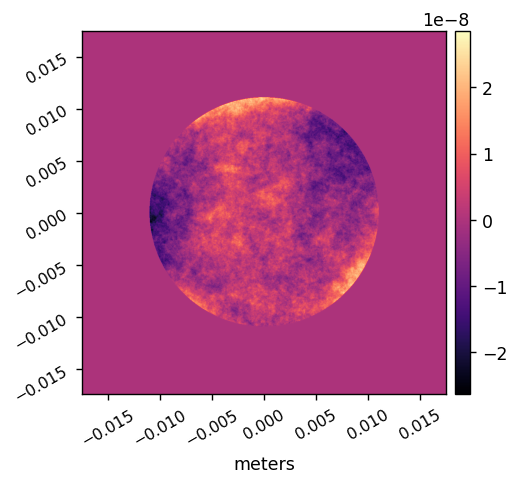

roman_phasec_OAP8_phase_error_V3.0.fits
1.0128902e-05 spacing in meters


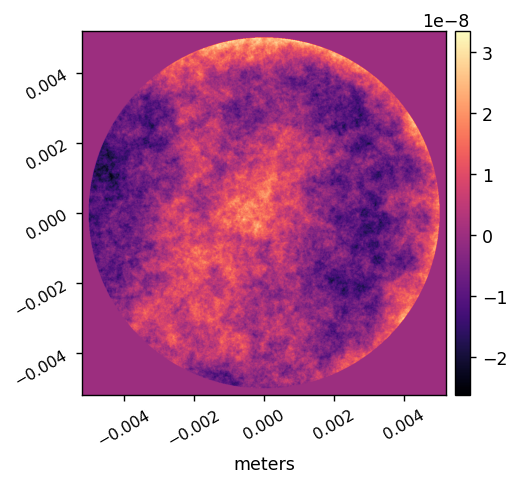

roman_phasec_POMAFOLD_measured_phase_error_V1.1.fits
0.000113855 spacing in meters


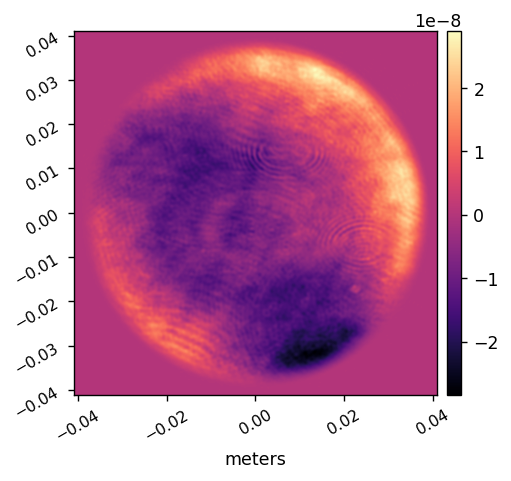

roman_phasec_PRIMARY_synthetic_phase_error_V1.0.fits
0.00465 spacing in meters


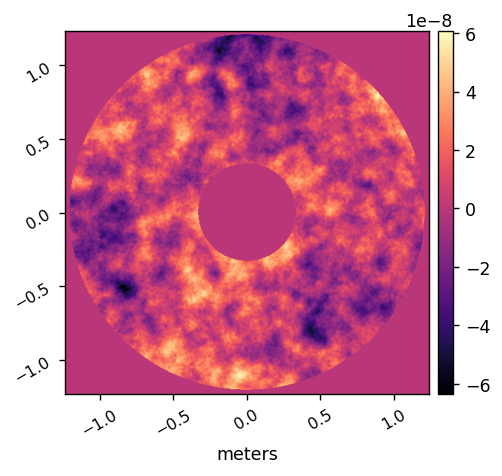

roman_phasec_PUPILFOLD_phase_error_V1.0.fits
3.400064e-05 spacing in meters


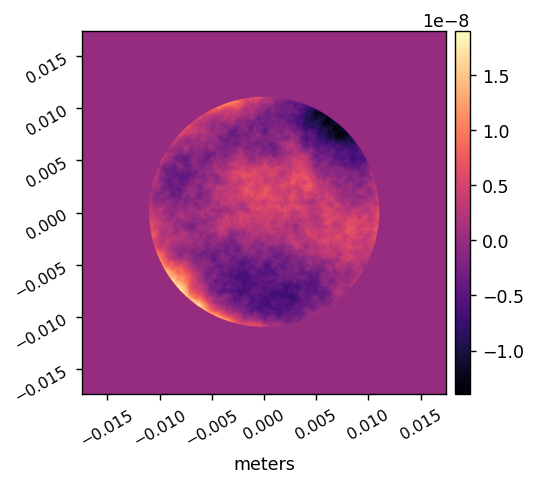

roman_phasec_PUPILLENS_phase_error_V1.0.fits
1.012897e-05 spacing in meters


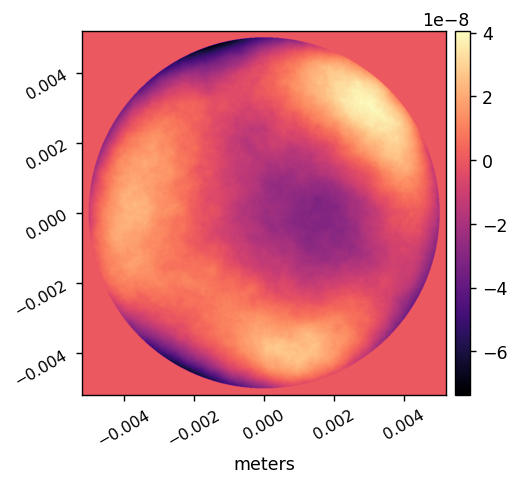

roman_phasec_PUPILMASK_phase_error_V1.0.fits
3.400064e-05 spacing in meters


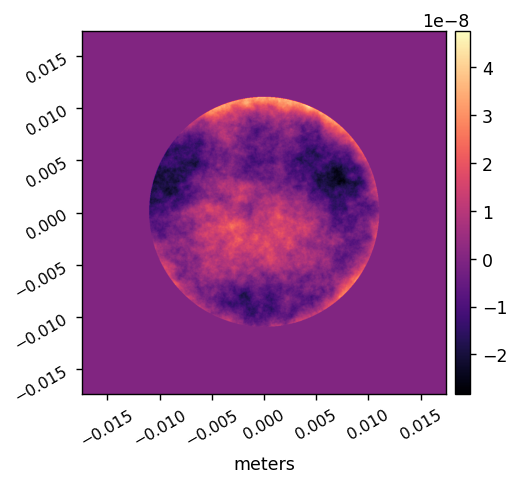

roman_phasec_SECONDARY_synthetic_phase_error_V1.0.fits
0.001 spacing in meters


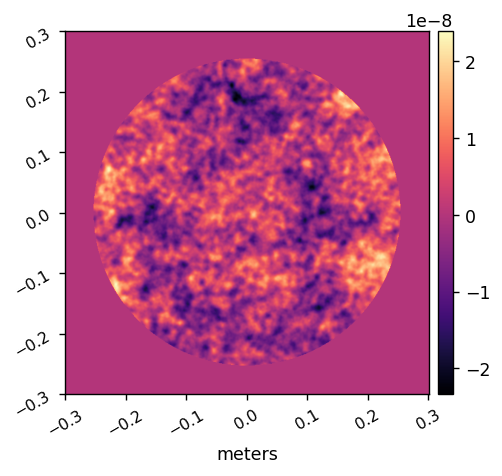

roman_phasec_TTFOLD_measured_phase_error_V1.1.fits
8.24521e-05 spacing in meters


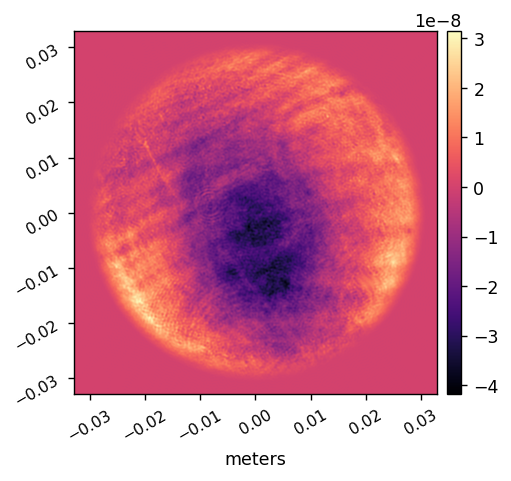

In [31]:
for i,fpath in enumerate(opd_fpaths):
    opd_map = fits.getdata(fpath)
    hdr = fits.getheader(fpath)
    pixscale = hdr['PIXSIZE']*u.m/u.pix
    
    print(fpath[51:])
    print(hdr['PIXSIZE'], hdr.comments['PIXSIZE'])
    misc.myimshow(opd_map, pxscl=pixscale)
    
    # Create new fits file for POPPY models
    hdr = fits.Header()
    hdr['PIXELSCL'] = pixscale.value
    hdr.comments['PIXELSCL'] = 'pixelscale in m/pix'
    hdu = fits.PrimaryHDU(data=opd_map, header=hdr)
    hdu.writeto(opddir/fpath[51:], overwrite=True)
    
#     if i==5: break